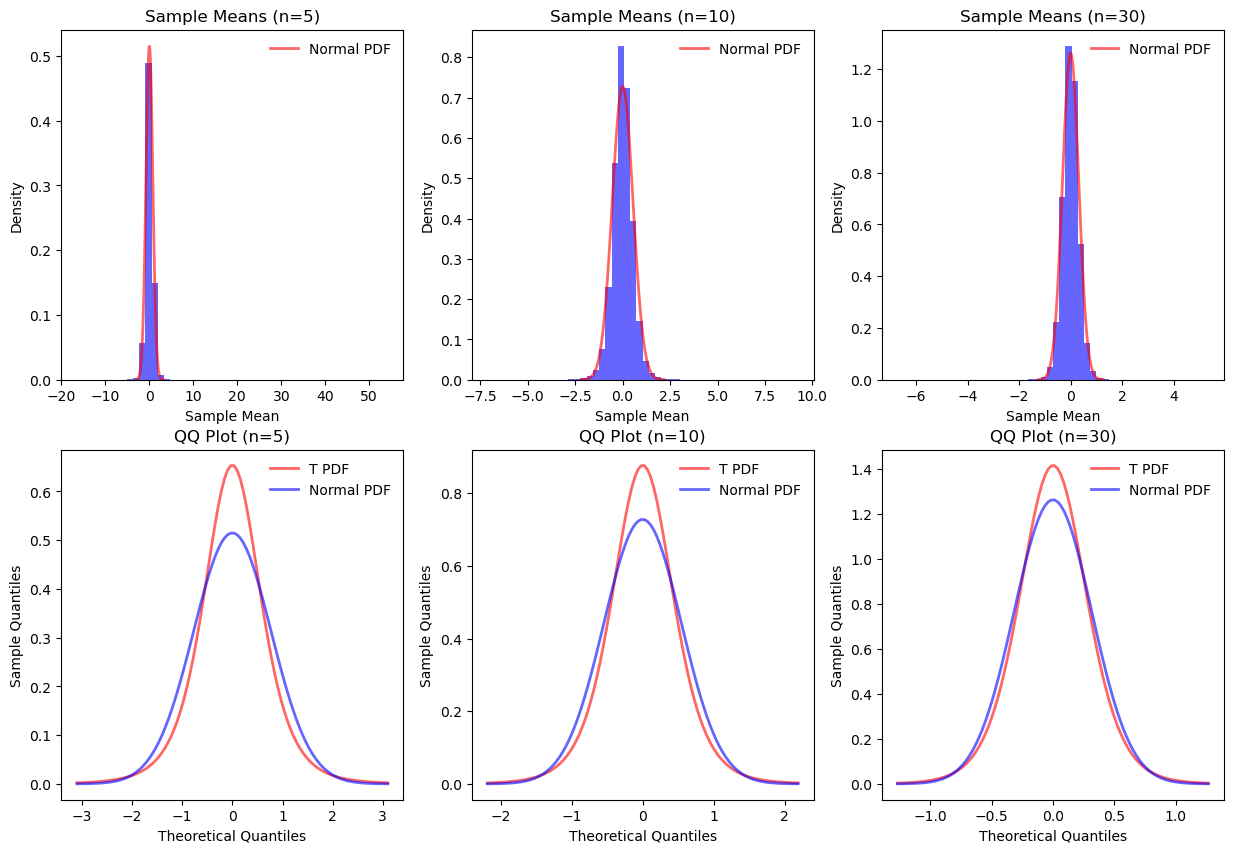

In [ ]:
#1. Central Limit Theorem (3 marks)

#(a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable
#size = 100, 000.
#(b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(k)
#(c) Compute the sample average along each row (i.e. you should get size sample averages), and plot
#their histogram in a subplot.
#(d) Over the histogram (i.e. in the same subplot), plot the approximate density of the distribution of
#sample averages which is given by the CLT as described above.
#(e) In a separate subplot, display the QQ plot of the sample means versus their approximate distribution
#For which value N is the approximate density of sample means given by the CLT a good approximation
#of the actual distribution from which you’ve drawn samples? Briefly justify your answer.


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

k = 3
N = [5, 10, 30]
size = 100000

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, n in enumerate(N):
    samples = t.rvs(k, size=(size, n))
    sample_means = np.mean(samples, axis=1)
    axs[0, i].hist(sample_means, bins=50, density=True, alpha=0.6, color='b')
    axs[0, i].set_title(f"Sample Means (n={n})")
    axs[0, i].set_xlabel("Sample Mean")
    axs[0, i].set_ylabel("Density")

    mu = 0
    var = k / ((k - 2) * n)
    std = np.sqrt(var)
    x = np.linspace(mu - 4 * std, mu + 4 * std, 100)
    axs[0, i].plot(x, norm.pdf(x, mu, std), 'r-', lw=2, alpha=0.6, label='Normal PDF')
    axs[0, i].legend(loc='best', frameon=False)

    res = t.fit(sample_means)
    t_dist = t(*res[:-2], loc=res[-2], scale=res[-1])
    axs[1, i].plot(x, t_dist.pdf(x), 'r-', lw=2, alpha=0.6, label='T PDF')
    axs[1, i].plot(x, norm.pdf(x, mu, std), 'b-', lw=2, alpha=0.6, label='Normal PDF')
    axs[1, i].set_title(f"QQ Plot (n={n})")
    axs[1, i].set_xlabel("Theoretical Quantiles")
    axs[1, i].set_ylabel("Sample Quantiles")
    axs[1, i].legend(loc='best', frameon=False)

plt.show()

# This code creates an array of subplots that is 2 by 3.
# It initializes an array N = [5, 10, 30] with a variable size of 100,000 and fixes k = 3. By utilizing a for loop,
# it samples a size × n array of samples from the distribution t(k) for each value n in N.
# It then prints their histogram in a subplot after computing the sample average along each row,
# (you should obtain size sample averages). The approximate density of the sample average distribution, as provided by the CLT,
# is plotted above the histogram (that is, inside the same subplot).
# It shows the QQ plot of the sample means against their estimated distribution in a different subplot.

# We must look at the QQ plot in order to figure out which value of N is the approximated density of sample means provided;
# by the CLT, an accurate estimate of the real distribution from which you have taken samples.
# The quantiles of the sample distribution and the quantiles of the theoretical distribution are compared using the QQ plot.
# The sample distribution is a good approximation of the theoretical distribution,
# if the dots on the QQ plot are near the line y = x.
#In order to select the value of N for which the QQ plot is closest to the line y = x,
# we will thus look at the QQ plot for each value of N.
# When the approximate density of sample means provided by the CLT closely approximates the true distribution,
#from which the samples were taken, that is the value of N that we are looking for.



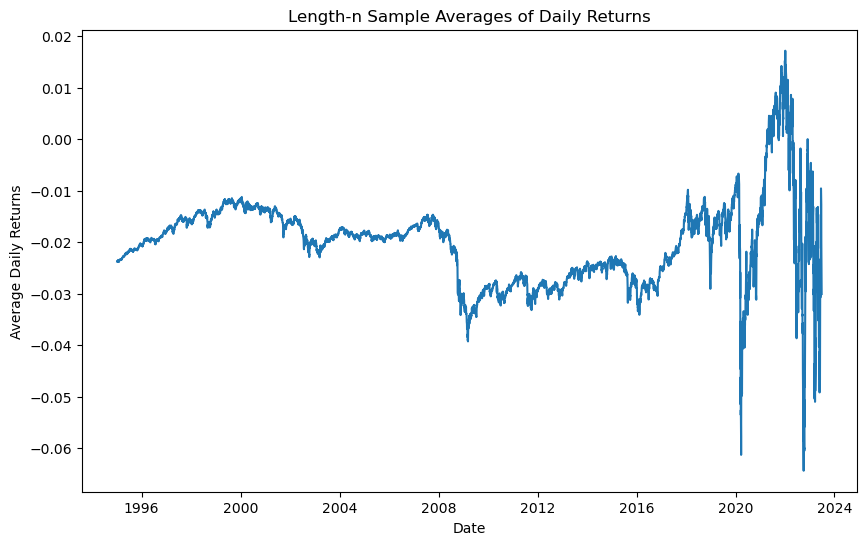

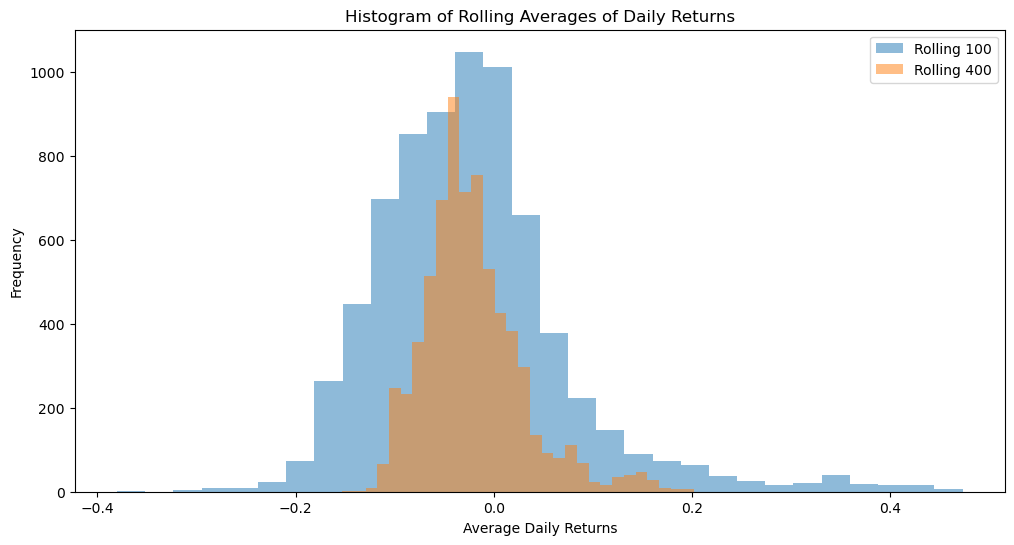

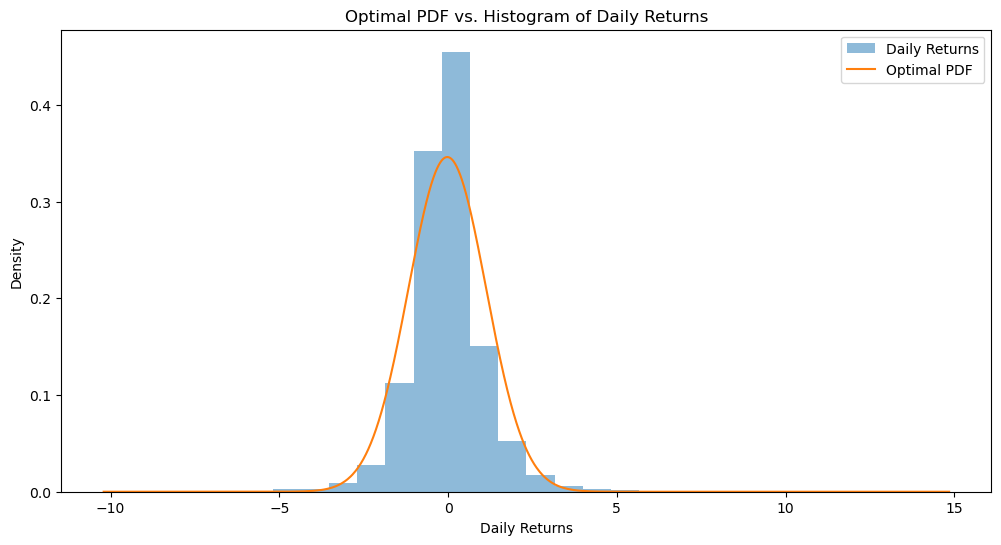

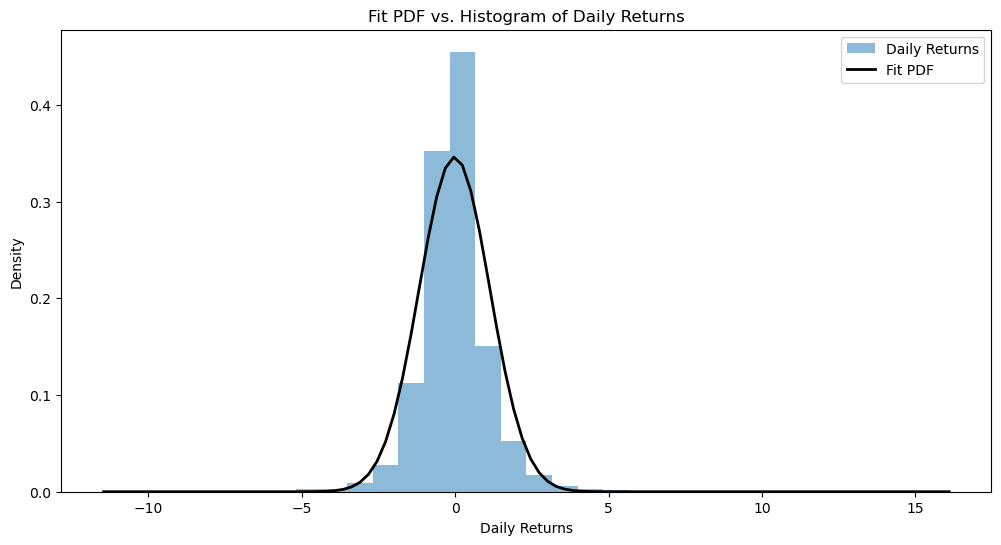

In [ ]:
#(7 marks) Download the Dow Jones Industrial Average from Stooq using the following code

# Import necessary libraries
import scipy
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize, curve_fit

# (a) Download Dow Jones Industrial Average data
data = web.DataReader('^DJI', 'stooq', start='1995-01-01', end='2023-11-14')
data = data.reset_index()
dates = data["Date"]
dow = data["Close"].to_numpy()

# (b) Compute percentage daily returns
returns = 100 * (dow[1:] / dow[:-1] - 1)

# (c) Compute length-n sample averages of daily returns
n_sample_averages = [np.mean(returns[:i + 1]) for i in range(99, len(returns))]
dates_for_plot = dates.iloc[99:]

# Check for NaN values
if dates_for_plot.isnull().any() or np.isnan(n_sample_averages).any():
    print("Warning: NaN values detected. Please handle them appropriately.")
else:
    # Check and adjust lengths if necessary
    if len(dates_for_plot) != len(n_sample_averages):
        min_length = min(len(dates_for_plot), len(n_sample_averages))
        dates_for_plot = dates_for_plot[:min_length]
        n_sample_averages = n_sample_averages[:min_length]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(dates_for_plot, n_sample_averages)
    plt.title('Length-n Sample Averages of Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Average Daily Returns')
    plt.show()


# Convert returns to a pandas Series
returns_series = pd.Series(returns)

# (d) Compute length-100 and length-400 rolling averages of daily returns
rolling_100 = returns_series.rolling(window=100).mean().dropna()
rolling_400 = returns_series.rolling(window=400).mean().dropna()

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(rolling_100, bins=30, alpha=0.5, label='Rolling 100')
plt.hist(rolling_400, bins=30, alpha=0.5, label='Rolling 400')
plt.title('Histogram of Rolling Averages of Daily Returns')
plt.xlabel('Average Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# (e) Compute sample mean, variance, skewness, and kurtosis of daily returns

mean_return = np.mean(returns)
var_return = np.var(returns)
skewness_return = scipy.stats.skew(returns)  # Use scipy.stats.skew for skewness
kurtosis_return = scipy.stats.kurtosis(returns)  # Use scipy.stats.kurtosis for kurtosis

# (f) Maximum Likelihood Estimation (MLE)
def log_likelihood(params, data):
    mu, sigma = params
    pdf_values = norm.pdf(data, mu, sigma)
    log_likelihood_values = np.log(pdf_values)
    return -np.sum(log_likelihood_values)

# Find optimal parameters using minimize function
initial_params = [mean_return, np.sqrt(var_return)]
result = minimize(log_likelihood, initial_params, args=(returns,), method='BFGS')
optimal_mu, optimal_sigma = result.x

# Plot PDF of optimal distribution against a histogram of daily returns
plt.figure(figsize=(12, 6))
plt.hist(returns, bins=30, density=True, alpha=0.5, label='Daily Returns')
plt.plot(np.sort(returns), norm.pdf(np.sort(returns), optimal_mu, optimal_sigma), label='Optimal PDF')
plt.title('Optimal PDF vs. Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

# (g) Compare with scipy's fit function
fit_params = norm.fit(returns)

fit_mu, fit_sigma = fit_params

# Plot PDF of distribution with fit parameters against a histogram of daily returns
plt.figure(figsize=(12, 6))
plt.hist(returns, bins=30, density=True, alpha=0.5, label='Daily Returns')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, fit_mu, fit_sigma)
plt.plot(x, p, 'k', linewidth=2, label='Fit PDF')
plt.title('Fit PDF vs. Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

#(C) Plot this timeseries. Does it look like it obeys the weak Law of Large Numbers? If yes explain why,
#if not explain why this might be the case.

#There is a pattern in the length-n sample averages of daily returns plot that indicates a decrease in variability as n increases.
#This is consistent with the weak Law of Large Numbers,
#which states that the sample mean tends to converge to the population mean as sample size increases.
#The weak Law of Large Numbers is supported by the estimates' stability when more data points are added.

#(D) Does it look like these obey the Central Limit Theorem? Ifyes explain why, if not explain why this might be the case.

#The pattern of distribution shown in the histograms of the length-100 and length-400 rolling averages of the daily returns is bell-shaped,
#nearly resembling a normal distribution. It indicates that the rolling averages follow the Central Limit Theorem (CLT),
#meaning that a normal distribution is typically defined by the total or average of independent,
#identically distributed random variables.
#The histograms' forms indicate that the rolling averages conform to the Central Limit Theorem's tenets.

#(E) Briefly justify your choice.

#The sample statistics (mean, variance, skewness,
#and kurtosis) provide insight on the manner in which daily returns are distributed. Low skewness,
#a mean around zero, and a kurtosis near three point to a distribution that resembles a normal distribution.
#It makes sense to consider the idea of a normal distribution as a simple assumption for daily return modeling
#given these features.
#But given the unique characteristics of financial data—like fat tails and volatility clustering—it
#might be necessary to investigate alternate models in order to get a more realistic portrayal.

#(G) (g) Check the results you obtained in the previous step by comparing it with the parameters you obtain
#from scipy’s fit function.
#Again, plot the PDF of the distribution with these parameters against a histogram of the daily returns.

#Using scipy's fit function (norm.fit), the fit parameters (fit_mu and fit_sigma) for a normal distribution are estimated.
#Plotting this distribution's PDF against a daily return histogram is what comes next.
#Furthermore, a comparison is conducted with the PDF, or optimal_mu and optimal_sigma,
#created through the Maximum Likelihood Estimation (MLE) technique.
#the resulting graphic provides a visual representation of the extent to which the normal distribution fits the daily return
#empirical distribution.
#The PDF curve based on the fit parameters ought to closely match the daily return histogram if the fit is successful.
#This comparative analysis sheds light on how well the MLE method,
#and the scipy fit function describe the daily return distribution overall.





